## Monte Carlo - Forecasting Stock Prices

<b>What is Monte Carlo Simulation?</b>
- Monte Carlo Simulation is a statistical method applied in financial modeling where the probability of different outcomes in a problem cannot be simply solved due to the interference of a random variable. The simulation relies on the repetition of random samples to achieve numerical results. It can be used to understand the effect of uncertainty and randomness in forecasting models.
<br><br>
- In essence, the Monte Carlo simulation can be used in almost any probabilistic problem. This explains why it can be used in different fields, including statistics, finance, engineering, and science.

<b>Theory of Monte Carlo Simulation</b>
- The main ideas behind the Monte Carlo simulation are the repeated random sampling of inputs of the random variable and the aggregation of the results. The variable with a probabilistic nature is assigned a random value. The model is then calculated based on the random value. The result of the model is recorded, and the process is repeated. Usually, the process is repeated hundreds or thousands of times. When the simulation is complete, the results can be averaged to determine the estimated value.

<b>Calculations</b>
<img src="1_YcTh0gKplFrZTIZRaBgjJQ.png" width="400">

<b>Phase 1:</b>
- Import libraries
- Download data from Yahoo Finannce
- Compute log returns, variance and drift

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.stats import norm
import yfinance as yf

In [2]:
#Download the data for Microsoft (‘MSFT’) from Yahoo Finance for the period ‘2000-1-1’ until today.
ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start='2000-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
#Use the .pct_change() method to obtain the log returns of Microsoft for the designated period.
log_returns = np.log(1 + data.pct_change())

#u = mean value of the log returns
u = log_returns.mean()

#var = variance of the log returns
var = log_returns.var()

$$
drift = u - \frac{1}{2} \cdot var
$$

In [4]:
drift = u - (0.5 * var)

In [5]:
drift

MSFT    0.000172
dtype: float64

In [6]:
stdev = log_returns.std()

In [7]:
stdev

MSFT    0.019395
dtype: float64

- Forecast future stock prices for every trading day a year ahead. So, assign 250 to “t_intervals”.
- Let’s examine 1000 possible outcomes. Assign “iterations” to the value of 1000.

In [8]:
t_intervals = 250
iterations = 1000

$$
daily\_returns = exp({drift} + {stdev} * z), 
$$ 
<br>
$$
where\  z = norm.ppf(np.random.rand(t\_intervals, iterations)
$$

In [9]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

***

In [10]:
#S0 = the last adjusted closing price of Microsoft
s0 = data.iloc[-1]

In [11]:
#price_list with the same dimension as the daily_returns matrix. 
price_list = np.zeros_like(daily_returns)

In [12]:
#Assigning the values on the first row of the price_list array equal to S0.
price_list[0] = s0

In [13]:
#Create a loop in the range (1, t_intervals) that:
#reassigns to the price in time t, the product of the price in day (t-1) with the value of the daily returns in t.
for i in range(1,t_intervals):
    price_list[i] = price_list[i-1]*daily_returns[i]

Finally, plot the obtained price list data.

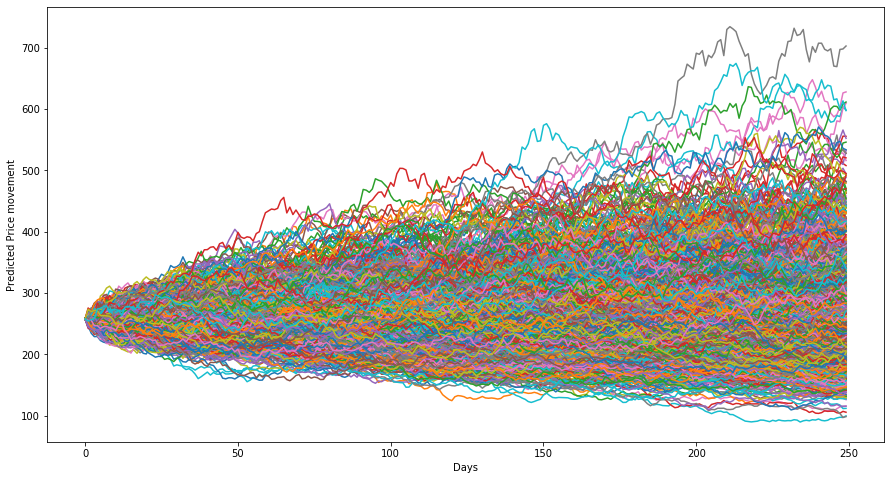

In [16]:
plt.figure(figsize=(15,8))
plt.plot(price_list)
plt.xlabel('Days')
plt.ylabel('Predicted Price movement')
plt.show()

<b>Interpreting the Simulation</b> <br>(All prices are in dollars)
- The current Price is 257.890<br><br>
- Expected price movement after 50 days : 
        -Lowest: 175 
        -Highest: 350
- Expected price movement after 150 days : 
        -Lowest: 120 
        -Highest: 550- Expected price movement after 150 days : 
        -Lowest: 120 
        -Highest: 550
- Expected price movement after 250 days : 
        -Lowest: 100 
        -Highest: 700